In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_parquet("/home/rzby/airpressure_ann/ann_pressure_prediction/data/raw/synop_96749_soetta.parquet")
df.head()

,WMO_ID,DATA_TIMESTAMP,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED
0,96749,2024-12-31 23:00:00+00:00,NaN,23.6,25.0,24.0,2.0,92.0,1008.8,1007.5
1,96749,2024-12-31 22:00:00+00:00,NaN,23.6,25.3,24.1,2.0,91.0,1008.4,1007.1
2,96749,2024-12-31 21:00:00+00:00,0.0,23.6,25.4,24.1,3.0,90.0,1007.7,1006.4
3,96749,2024-12-31 20:00:00+00:00,NaN,23.6,25.8,24.2,4.0,88.0,1008.0,1006.7
4,96749,2024-12-31 19:00:00+00:00,NaN,23.6,26.1,24.3,3.0,86.0,1008.8,1007.5


In [4]:
for nama in df.columns.values:
    print(nama)

WMO_ID
DATA_TIMESTAMP
RAINFALL_LAST_MM
TEMP_DEWPOINT_C_TDTDTD
TEMP_DRYBULB_C_TTTTTT
TEMP_WETBULB_C
WIND_SPEED_FF
RELATIVE_HUMIDITY_PC
PRESSURE_QFF_MB_DERIVED
PRESSURE_QFE_MB_DERIVED


In [5]:
df['ts'] = pd.to_datetime(df['DATA_TIMESTAMP'], utc=True)
df = df.set_index('ts').sort_index()
df.head()

,WMO_ID,DATA_TIMESTAMP,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED
ts,,,,,,,,,,
2015-01-01 00:00:00+00:00,96749,2015-01-01 00:00:00+00:00,0.0,22.4,23.9,22.8,7.0,91.1,1010.8,1009.5
2015-01-01 01:00:00+00:00,96749,2015-01-01 01:00:00+00:00,NaN,23.4,24.2,23.6,7.0,95.1,1011.2,1009.9
2015-01-01 02:00:00+00:00,96749,2015-01-01 02:00:00+00:00,NaN,23.6,25.4,24.1,10.0,89.8,1011.5,1010.2
2015-01-01 03:00:00+00:00,96749,2015-01-01 03:00:00+00:00,0.8,24.4,26.0,24.8,11.0,90.7,1011.2,1009.8
2015-01-01 04:00:00+00:00,96749,2015-01-01 04:00:00+00:00,NaN,23.8,27.8,24.9,12.0,79.0,1010.2,1008.9


In [6]:
df = df.drop(columns=['DATA_TIMESTAMP'])

In [7]:
df.replace(to_replace={
    8888: 0.01,
    9999: np.nan
}, inplace=True)

In [8]:
FULL_IDX = pd.date_range(
    start="2015-01-01 00:00",
    end = "2024-12-31 21:00",
    freq="3h",
    tz="utc"
)
df_full = df.reindex(FULL_IDX)
df_full.head()

,WMO_ID,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED
2015-01-01 00:00:00+00:00,96749.0,0.0,22.4,23.9,22.8,7.0,91.1,1010.8,1009.5
2015-01-01 03:00:00+00:00,96749.0,0.8,24.4,26.0,24.8,11.0,90.7,1011.2,1009.8
2015-01-01 06:00:00+00:00,96749.0,0.0,23.8,27.6,24.8,11.0,79.7,1008.8,1007.5
2015-01-01 09:00:00+00:00,96749.0,7.9,24.2,25.2,24.5,8.0,94.4,1008.5,1007.2
2015-01-01 12:00:00+00:00,96749.0,0.9,23.7,25.6,24.2,7.0,89.1,1010.2,1008.8


In [9]:
df_full[df_full['WMO_ID'].isna()]['WMO_ID'] = '96749'

/tmp/ipykernel_16996/2470381008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full[df_full['WMO_ID'].isna()]['WMO_ID'] = '96749'


In [10]:
df_full['WMO_ID'] = df_full['WMO_ID'].astype(str)

In [11]:
print(f"Expected rows: {len(FULL_IDX):,}")
print(f"Actual rows  : {len(df_full):,}")

missing_pct = df_full.isna().mean().mul(100).round(2)
display(missing_pct.sort_values(ascending=False).head(10))


Expected rows: 29,224
Actual rows  : 29,224


RAINFALL_LAST_MM           7.28
WIND_SPEED_FF              0.35
PRESSURE_QFE_MB_DERIVED    0.35
TEMP_DEWPOINT_C_TDTDTD     0.34
TEMP_DRYBULB_C_TTTTTT      0.34
TEMP_WETBULB_C             0.34
RELATIVE_HUMIDITY_PC       0.34
PRESSURE_QFF_MB_DERIVED    0.34
WMO_ID                     0.00
dtype: float64

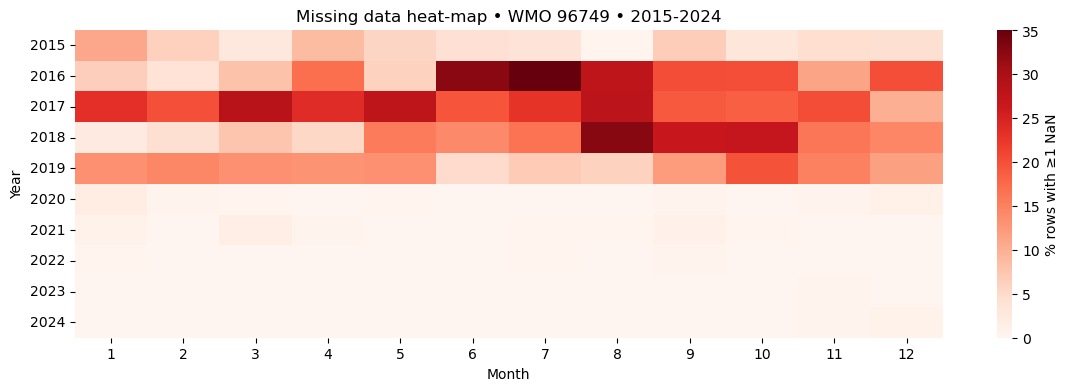

In [12]:
# Build a Y–M matrix of missing-row counts (any NaN in the row counts as missing)
mask_any_na = df_full.isna().any(axis=1)
miss_tbl = (
    mask_any_na.groupby([df_full.index.year, df_full.index.month])
    .mean()
    .unstack(level=1) * 100
)

plt.figure(figsize=(14,4))
sns.heatmap(miss_tbl, cmap="Reds", cbar_kws={"label":"% rows with ≥1 NaN"})
plt.title("Missing data heat-map • WMO 96749 • 2015-2024")
plt.ylabel("Year"); plt.xlabel("Month"); plt.show()


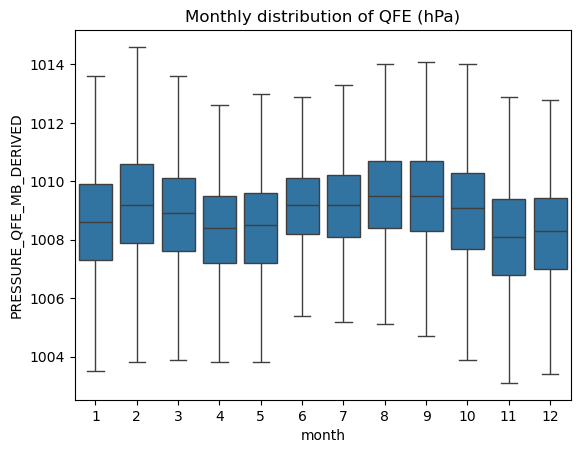

In [13]:
df_full['month'] = df_full.index.month
sns.boxplot(x='month', y='PRESSURE_QFE_MB_DERIVED', data=df_full, showfliers=False)
plt.title("Monthly distribution of QFE (hPa)")
plt.show()

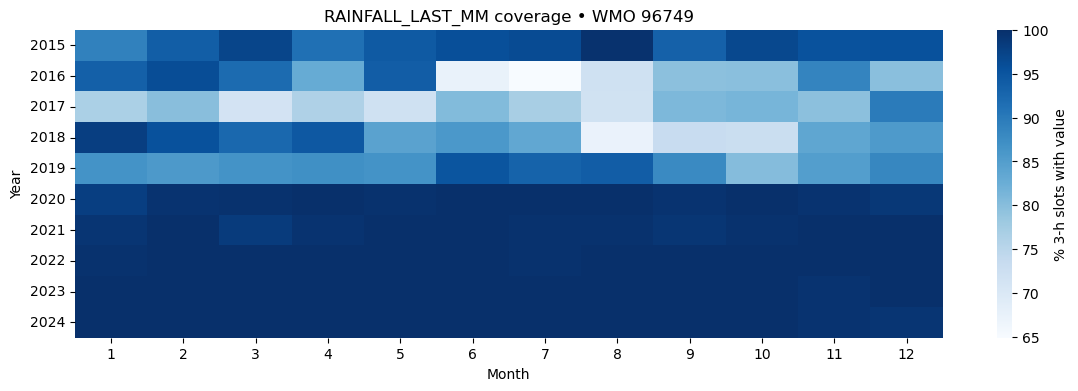

In [14]:
rain = df_full['RAINFALL_LAST_MM']
# Percentage of slots that have rainfall values each month
rain_pct = (
    rain.notna()
        .groupby([df_full.index.year, df_full.index.month])
        .mean()
        .unstack(level=1) * 100
)

plt.figure(figsize=(14,4))
sns.heatmap(rain_pct, cmap="Blues", cbar_kws={"label":"% 3-h slots with value"})
plt.title("RAINFALL_LAST_MM coverage • WMO 96749")
plt.ylabel("Year"); plt.xlabel("Month"); plt.show()


In [15]:
from pathlib import Path
OUTFILE = Path("/home/rzby/airpressure_ann/ann_pressure_prediction/data/interim/three_h-96749.parquet")
df_full.to_parquet(OUTFILE)